<B>Consider the series of the (log)- prices for a stock index over a given period.
Justify the choice of the period and of the frequency. Add the relevant series representative 
of the fundamentals.
Check that all series are I(1).
By referring to the Gordon-Shapiro model and its development presented in the course or 
derived from other references
- justify the existence of a long-term equation to describe the equilibrium price 
(estimation and test) with possible structural breaks
- estimate the corresponding error-correcting equation
R_code: See the one proposed for VAR-VEC

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


<B> DATA PROCESSING

In [78]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for USD/EUR exchange rate
usdeur_symbol = "USDEUR=X"

# Set the date range for the data
start_date = "1993-12-31"  # The earliest available date
end_date = "2023-09-29"  # The latest available date

# Fetch data for USD/EUR exchange rate
usdeur_data = yf.download(usdeur_symbol, start=start_date, end=end_date, interval="1d")['Adj Close']

# Merge the USD/EUR data with the existing asset_data
merged_data = df.join(usdeur_data, how='left', on =df.index)

# Print the merged data
print(merged_data)


[*********************100%***********************]  1 of 1 completed
                 SP50_L    SP50_C  VIX_L      VIX_C     RUSSEL_L  RUSSEL_C  \
Date                                                                         
2023-09-29  4288.054123 -3.647489  17.52  28.918322  4436.428527 -5.486839   
2023-06-30  4450.381312  8.299901  13.59 -27.326203  4693.979632  4.785074   
2023-03-31  4109.312445  7.027376  18.70 -13.705584  4479.626224  2.341406   
2022-12-30  3839.496587  7.080287  21.67 -31.467426  4377.139624  5.798558   
2022-09-30  3585.624104 -5.277158  31.62  10.135841  4137.239390 -2.533598   
...                 ...       ...    ...        ...          ...       ...   
1994-12-30   459.270000 -0.739156  13.20  -7.563025   623.480000 -2.266671   
1994-09-30   462.690000  4.146127  14.28  -4.609218   637.940000  6.527511   
1994-06-30   444.270000 -0.336496  14.97 -26.797066   598.850000 -4.243752   
1994-03-31   445.770000 -4.433487  20.45  75.385935   625.390000 -2.96810

In [79]:
merged_data

,SP50_L,SP50_C,VIX_L,VIX_C,RUSSEL_L,RUSSEL_C,US CPI Q %,US wholesale Q%,US_LT_INT,US_SR_INT,...,US_IMP_L,US_RTL_IND_L,US_FX_RS_L,US_HS_STARTS_L,Bentoil_L,NDAQ_L,Quarter,Year,log_SP50,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-29,4288.054123,-3.647489,17.52,28.918322,4436.428527,-5.486839,0.884005,1.757771,4.145724,5.433723,...,3078.6047,198.088850,229.949200,1359333.4,95.86,47.590000,3,2023,8.363588,NaN
2023-06-30,4450.381312,8.299901,13.59,-27.326203,4693.979632,4.785074,0.670480,-1.533278,3.595952,5.182264,...,3064.6829,195.032040,232.967290,1449666.6,74.51,48.590000,2,2023,8.400745,0.92013
2023-03-31,4109.312445,7.027376,18.70,-13.705584,4479.626224,2.341406,0.939837,0.145159,3.648469,4.716317,...,3128.5254,195.103420,235.948840,1385333.4,79.19,49.850000,1,2023,8.321011,0.91704
2022-12-30,3839.496587,7.080287,21.67,-31.467426,4377.139624,5.798558,1.025176,0.880015,3.824985,4.068744,...,3137.7640,193.524950,232.716640,1405333.4,82.82,54.670000,4,2022,8.253097,0.93802
2022-09-30,3585.624104,-5.277158,31.62,10.135841,4137.239390,-2.533598,1.358317,0.215173,3.099335,2.629804,...,3223.4940,193.794570,219.111700,1446333.4,88.90,61.350000,3,2022,8.184688,1.01734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-12-30,459.270000,-0.739156,13.20,-7.563025,623.480000,-2.266671,0.582049,0.105871,7.837302,5.443935,...,707.7280,58.893394,63.284090,1472000.0,16.23,12.716667,4,1994,6.129638,NaN
1994-09-30,462.690000,4.146127,14.28,-4.609218,637.940000,6.527511,0.926334,0.639327,7.327968,4.609062,...,684.5280,57.599510,65.478035,1454333.4,16.73,12.716667,3,1994,6.137057,NaN
1994-06-30,444.270000,-0.336496,14.97,-26.797066,598.850000,-4.243752,0.568061,0.133365,7.089518,4.111774,...,649.9880,56.385700,64.679214,1466666.6,17.45,12.716667,2,1994,6.096432,NaN


In [81]:
df=merged_data

In [58]:
df = pd.read_excel('DATASET.xlsx')
df.set_index('Date', inplace=True)

In [59]:
#df['Quarter']=df.index.quarter
#df['Year']=df.index.year

In [80]:
df.isna().sum()

SP50_L                 0
SP50_C                 1
VIX_L                  0
VIX_C                  1
RUSSEL_L               0
RUSSEL_C               1
US CPI Q %             0
US wholesale Q%        0
US_LT_INT              0
US_SR_INT              0
US_UNEMP_L             0
US_RT_IND_C            0
US_INDPROD_C           0
US_HSTART_C            0
US_EXP_C               0
US_IMP_C               0
US_BUD_BAL_PCT_GDP     1
US_DEBT_L              4
US_DEBT_C              5
US_EXP_L               0
US_IMP_L               0
US_RTL_IND_L           0
US_FX_RS_L             0
US_HS_STARTS_L         0
Bentoil_L              0
NDAQ_L                34
dtype: int64

In [82]:
df.fillna(df.median(), inplace=True)

In [20]:
df.isna().sum()

SP50_L                0
SP50_C                0
VIX_L                 0
VIX_C                 0
RUSSEL_L              0
RUSSEL_C              0
US CPI Q %            0
US wholesale Q%       0
US_LT_INT             0
US_SR_INT             0
US_UNEMP_L            0
US_RT_IND_C           0
US_INDPROD_C          0
US_HSTART_C           0
US_EXP_C              0
US_IMP_C              0
US_BUD_BAL_PCT_GDP    0
US_DEBT_L             0
US_DEBT_C             0
US_EXP_L              0
US_IMP_L              0
US_RTL_IND_L          0
US_FX_RS_L            0
US_HS_STARTS_L        0
Bentoil_L             0
NDAQ_L                0
dtype: int64

In [62]:
df['log_SP50']=np.log(df.SP50_L)

KeyboardInterrupt: 

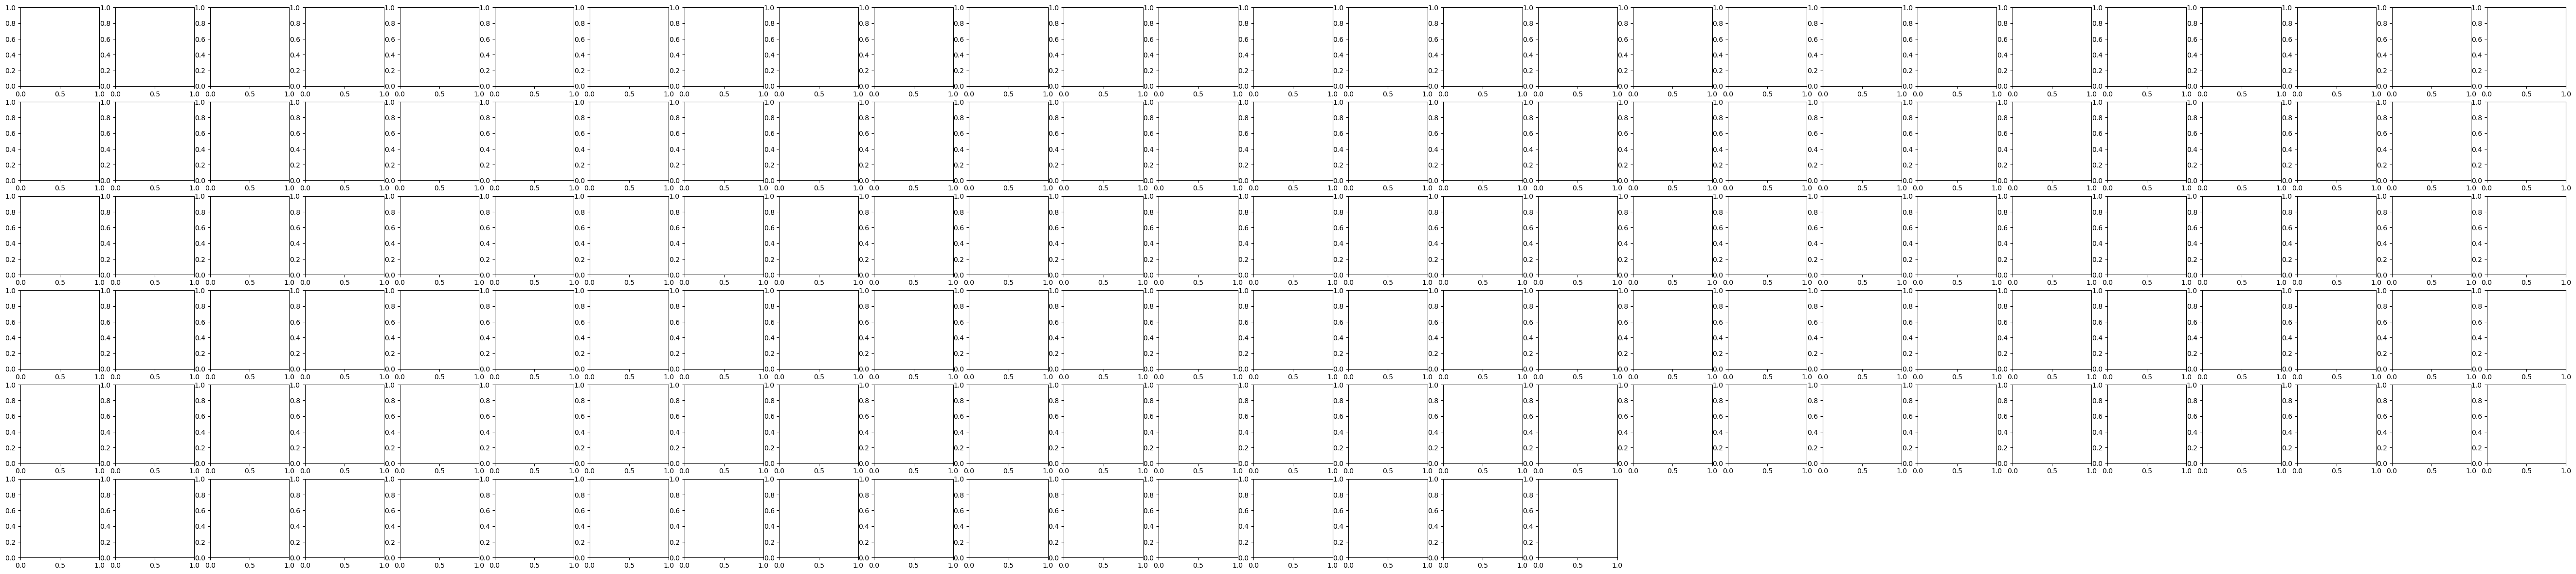

In [ ]:
sns.pairplot(df)

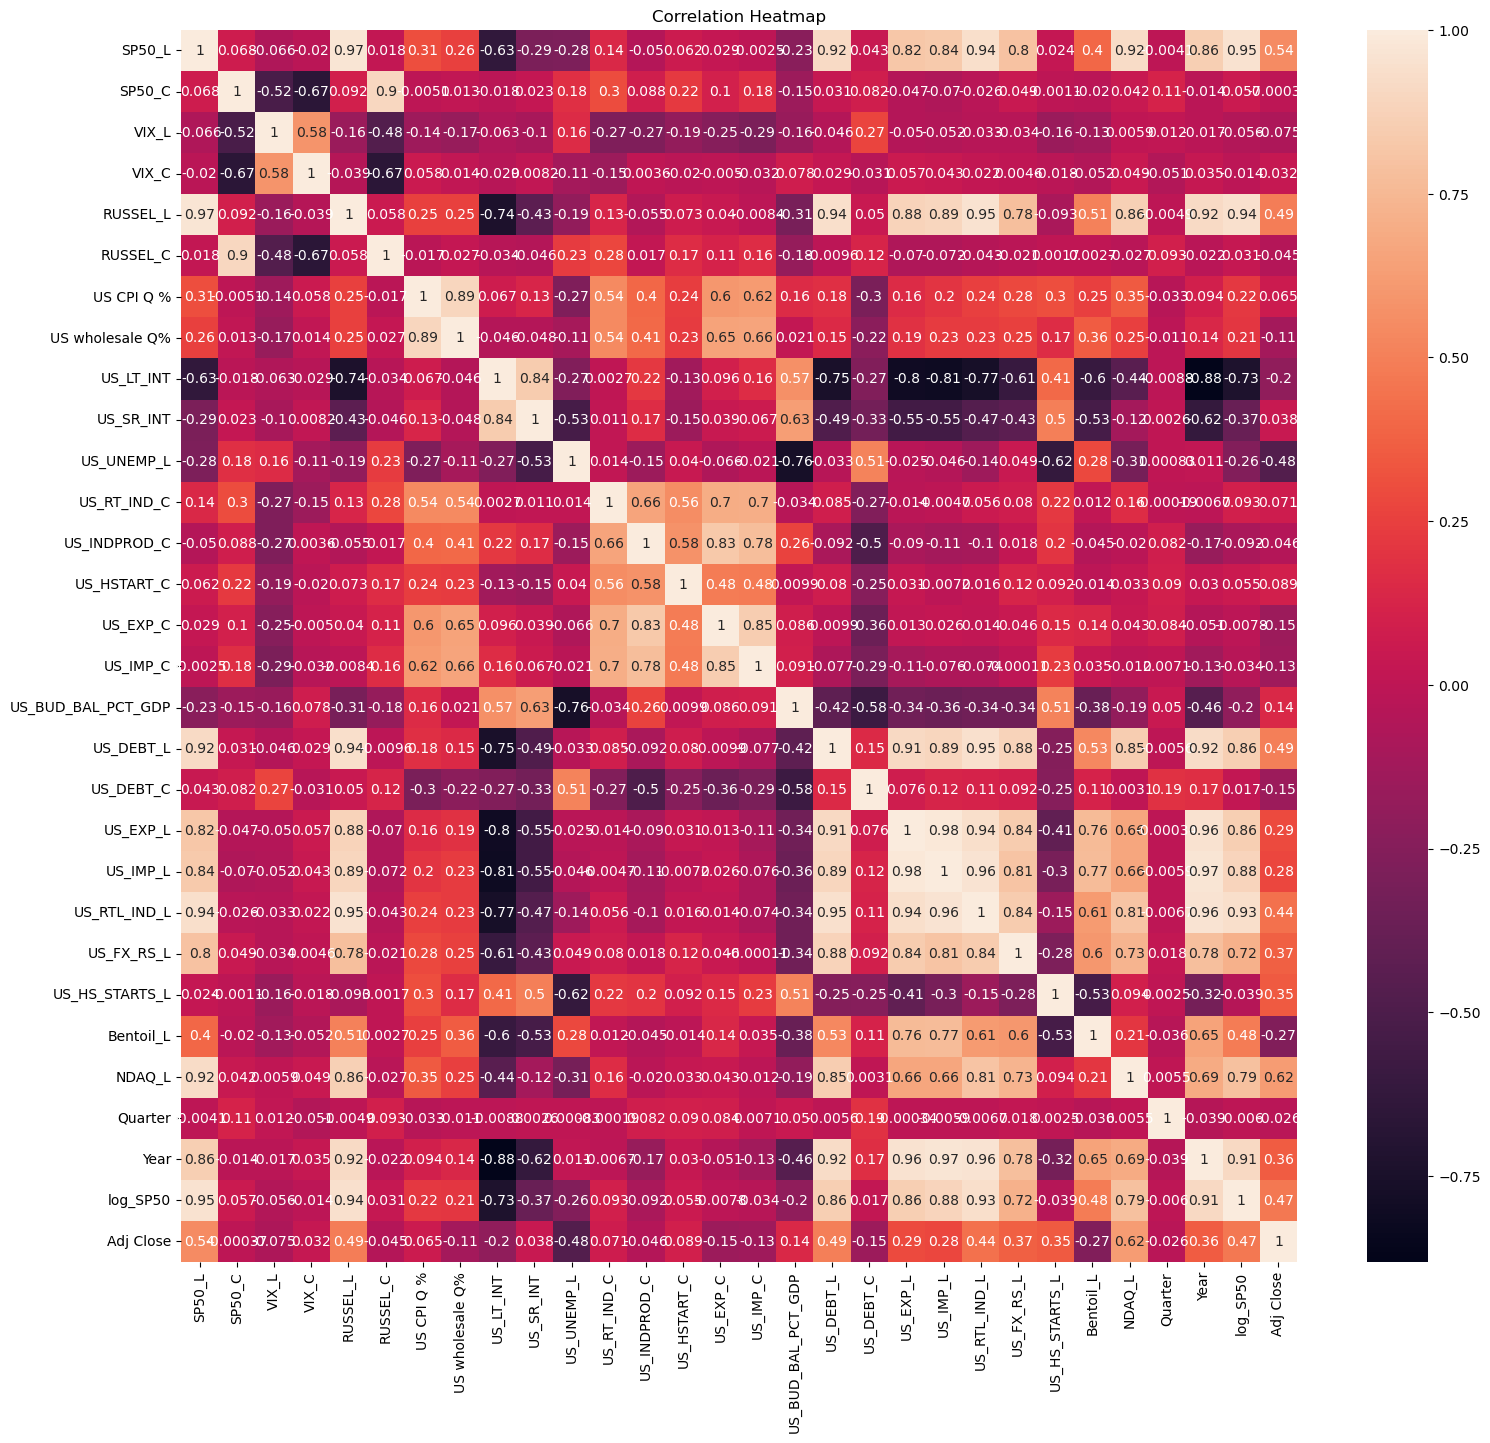

In [83]:
plt.figure(figsize=(18, 16))  # Adjust the width and height as needed

sns.heatmap(df.corr(), annot=True)

# Optionally, add labels and a title
plt.title("Correlation Heatmap")
plt.show()

<b>Check that all series are I(1).


In [84]:
from statsmodels.tsa.stattools import adfuller
I1=[]
# Loop through each column in the DataFrame
for column in df.columns:
    result = adfuller(df[column])
    p_value = result[1]

    if p_value < 0.05:
        print(f"{column} is stationary (not I(1)).")
    else:
        print(f"{column} is non-stationary (I(1)).")
        I1.append(column)


SP50_L is stationary (not I(1)).
SP50_C is stationary (not I(1)).
VIX_L is stationary (not I(1)).
VIX_C is stationary (not I(1)).
RUSSEL_L is non-stationary (I(1)).
RUSSEL_C is stationary (not I(1)).
US CPI Q % is stationary (not I(1)).
US wholesale Q% is stationary (not I(1)).
US_LT_INT is non-stationary (I(1)).
US_SR_INT is non-stationary (I(1)).
US_UNEMP_L is non-stationary (I(1)).
US_RT_IND_C is stationary (not I(1)).
US_INDPROD_C is stationary (not I(1)).
US_HSTART_C is stationary (not I(1)).
US_EXP_C is stationary (not I(1)).
US_IMP_C is stationary (not I(1)).
US_BUD_BAL_PCT_GDP is non-stationary (I(1)).
US_DEBT_L is stationary (not I(1)).
US_DEBT_C is stationary (not I(1)).
US_EXP_L is non-stationary (I(1)).
US_IMP_L is non-stationary (I(1)).
US_RTL_IND_L is stationary (not I(1)).
US_FX_RS_L is non-stationary (I(1)).
US_HS_STARTS_L is non-stationary (I(1)).
Bentoil_L is non-stationary (I(1)).
NDAQ_L is non-stationary (I(1)).
log_SP50 is non-stationary (I(1)).


In [85]:
I1

['RUSSEL_L',
 'US_LT_INT',
 'US_SR_INT',
 'US_UNEMP_L',
 'US_BUD_BAL_PCT_GDP',
 'US_EXP_L',
 'US_IMP_L',
 'US_FX_RS_L',
 'US_HS_STARTS_L',
 'Bentoil_L',
 'NDAQ_L',
 'log_SP50']

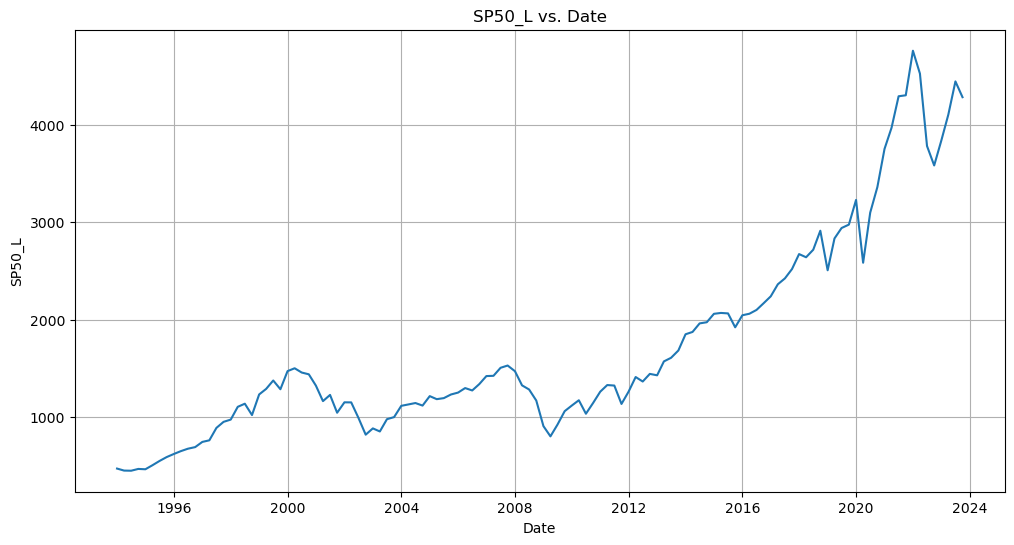

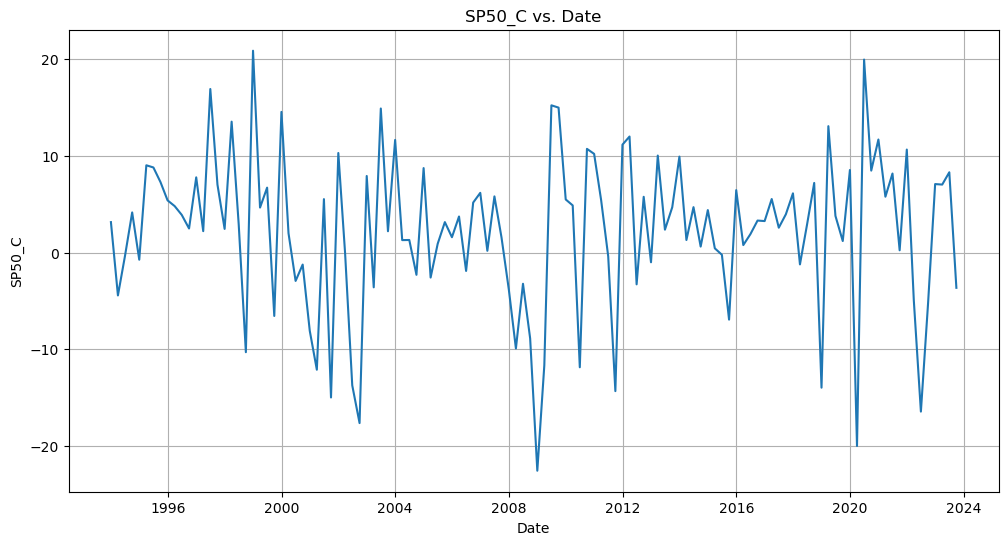

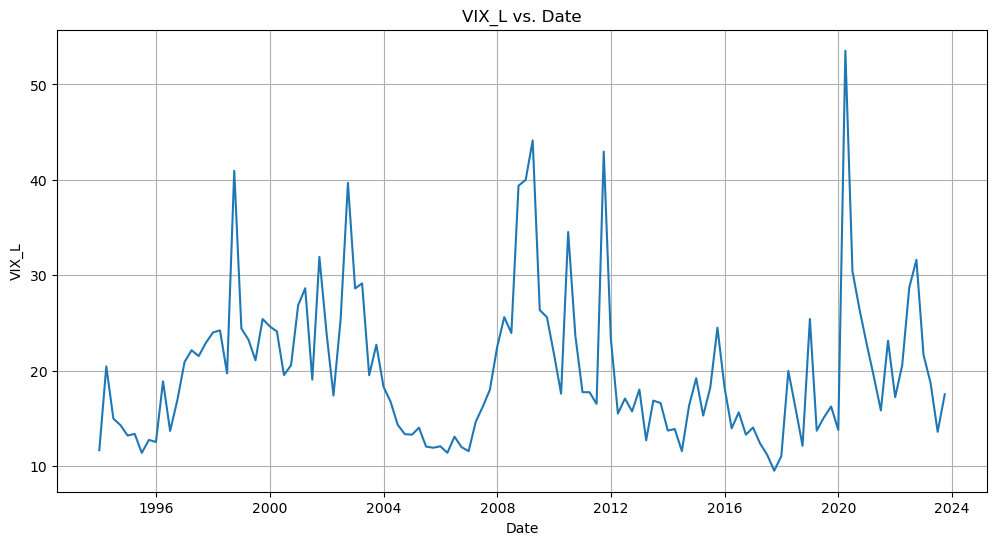

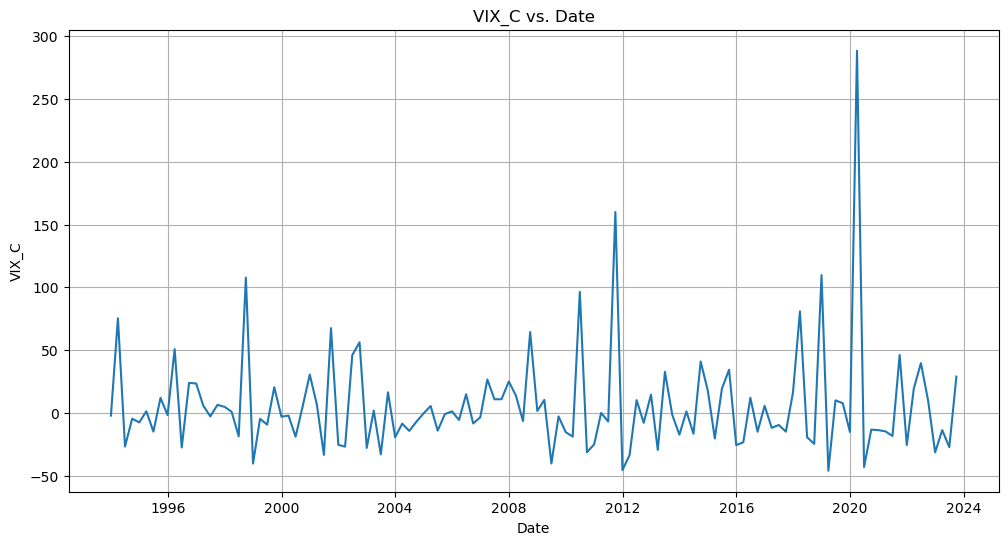

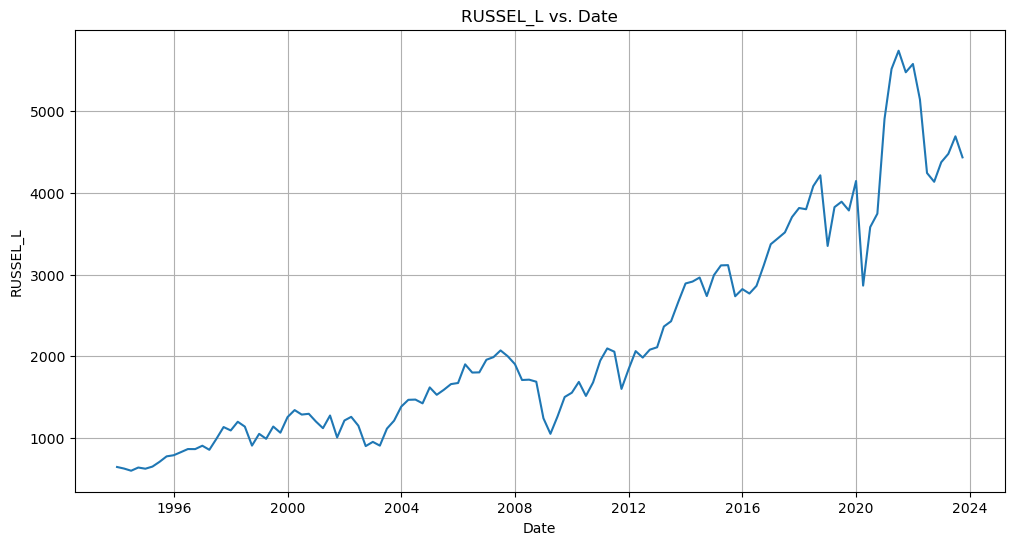

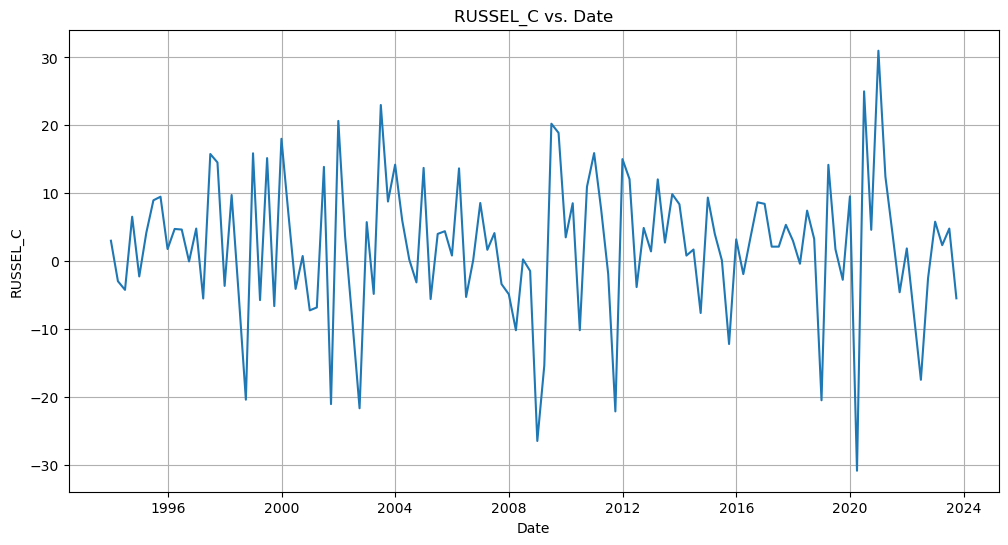

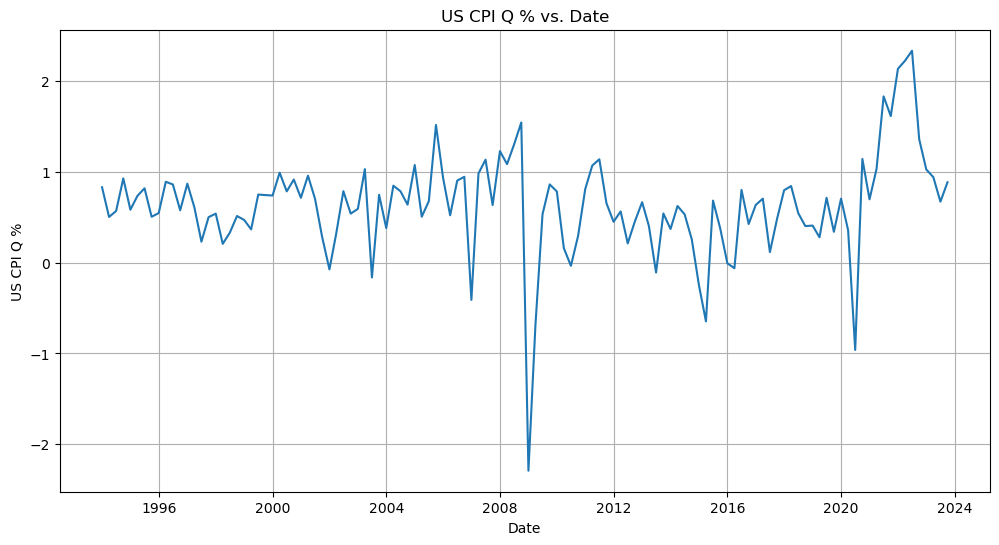

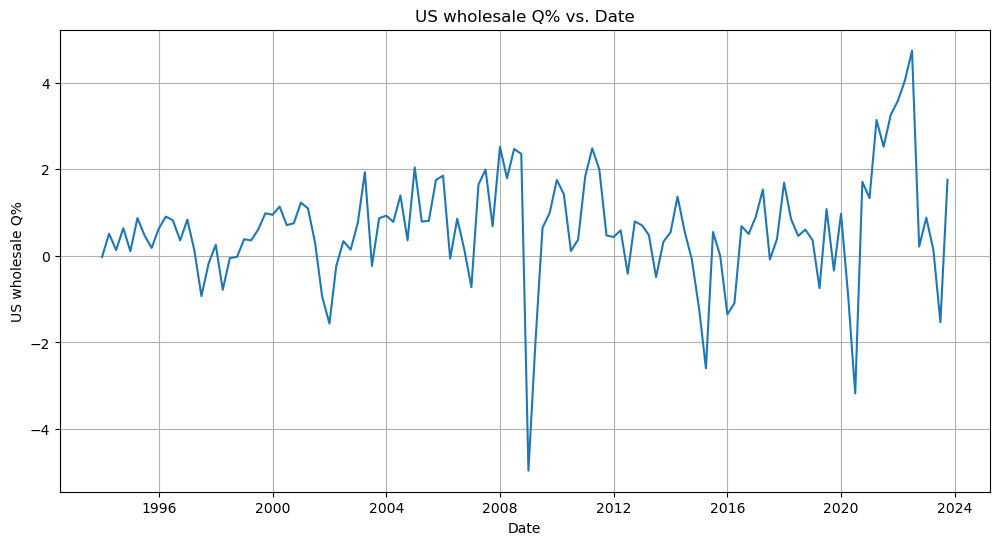

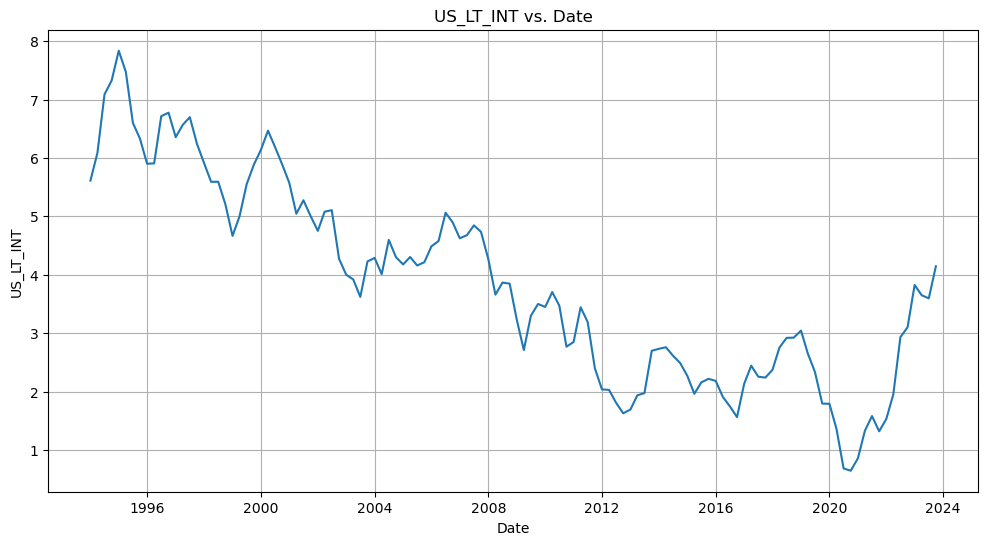

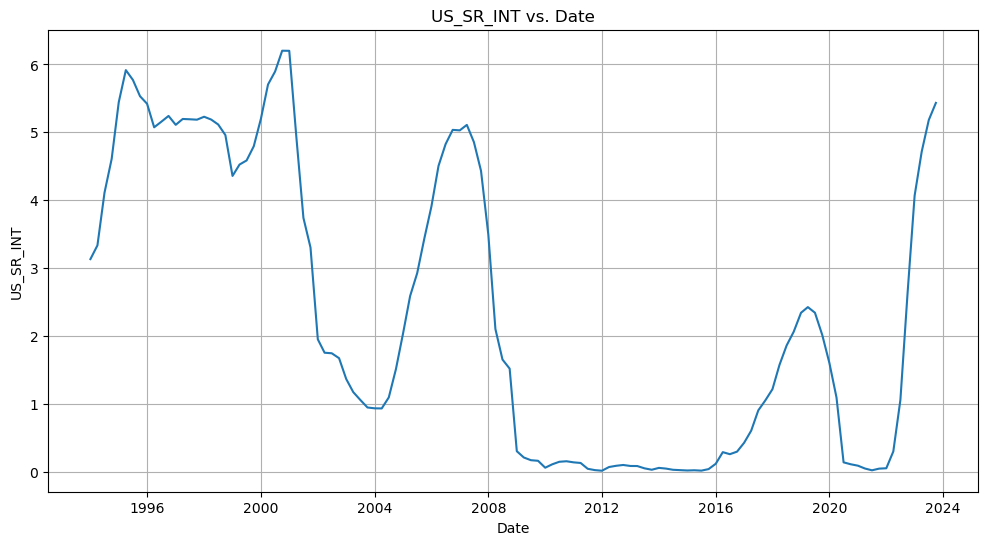

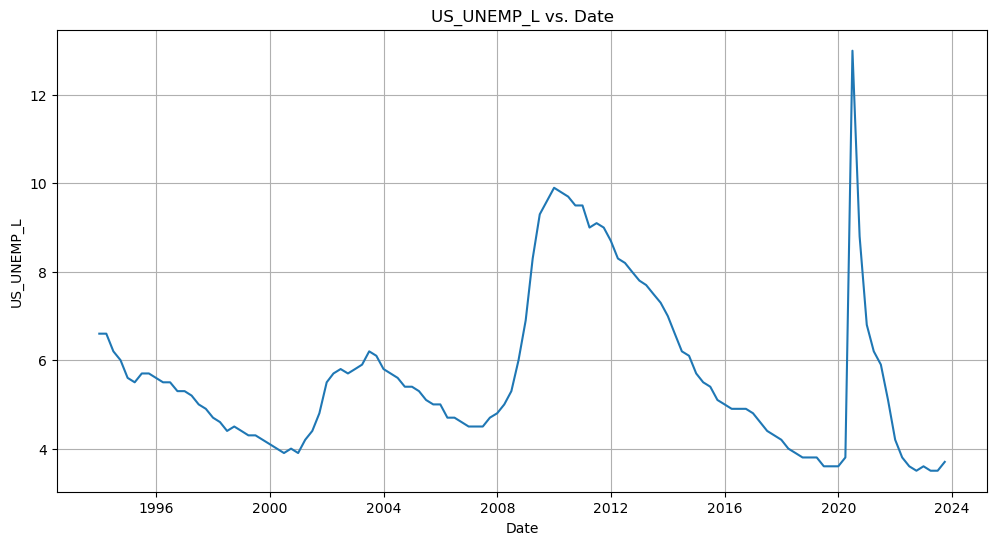

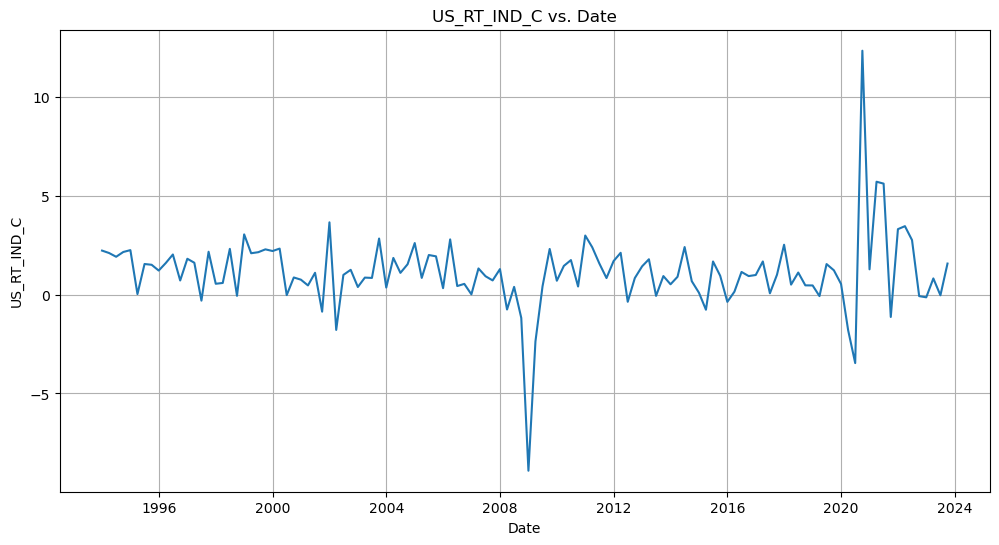

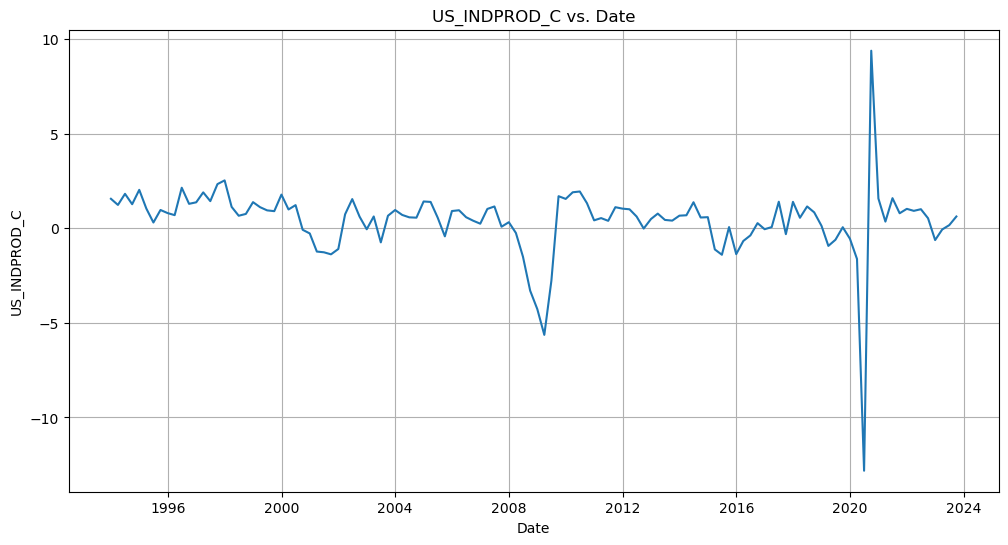

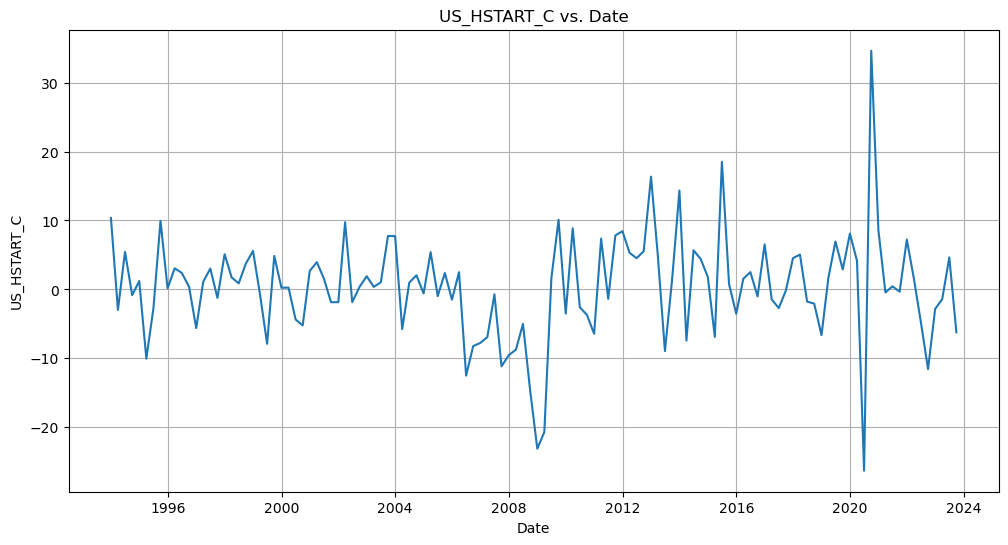

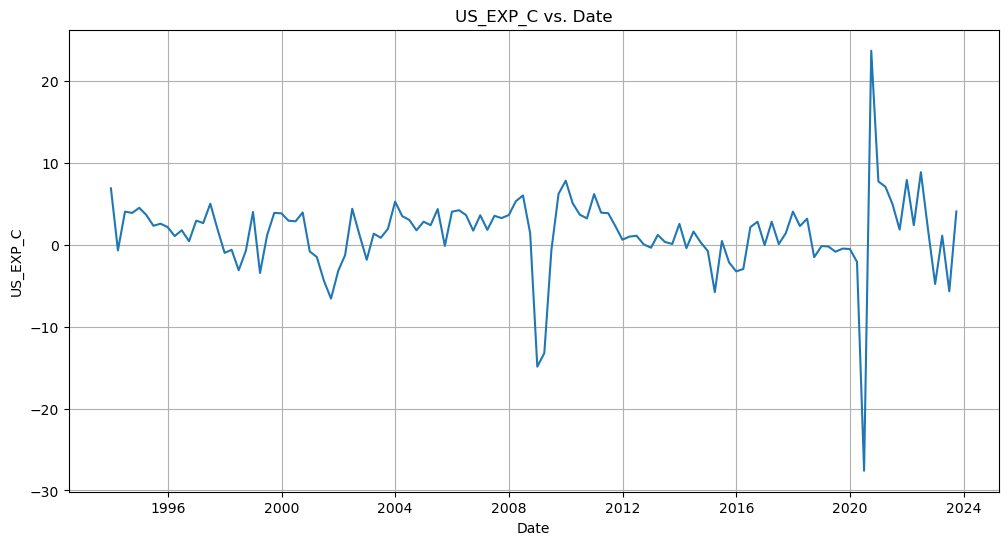

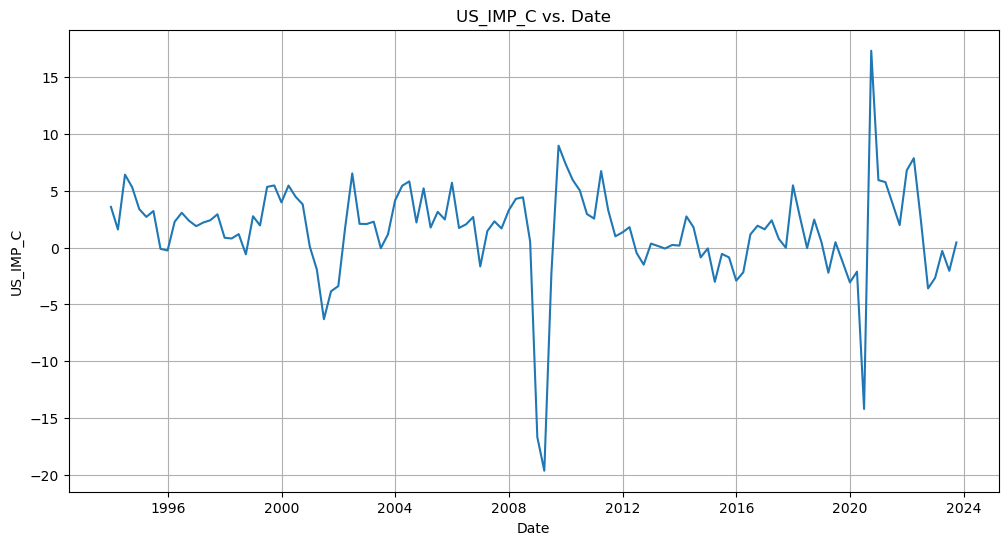

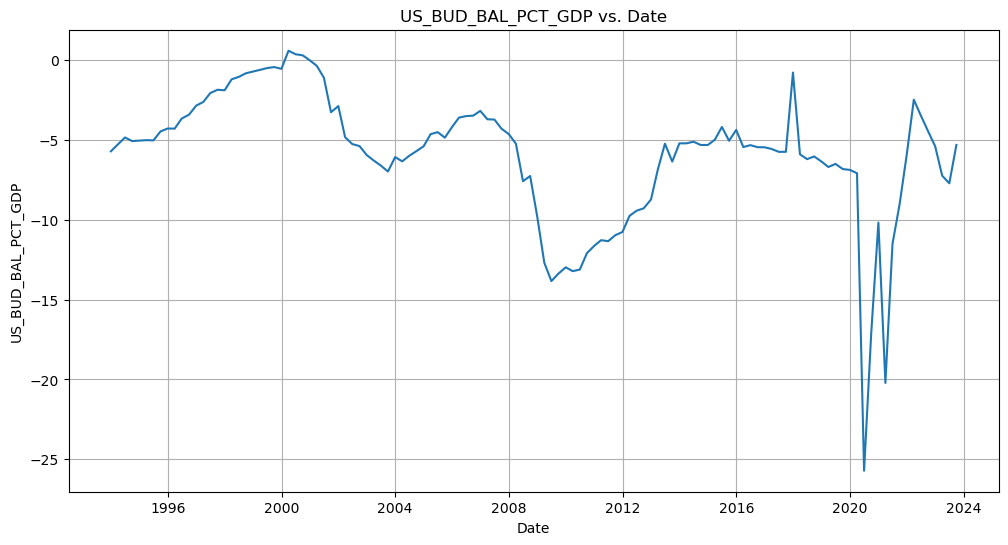

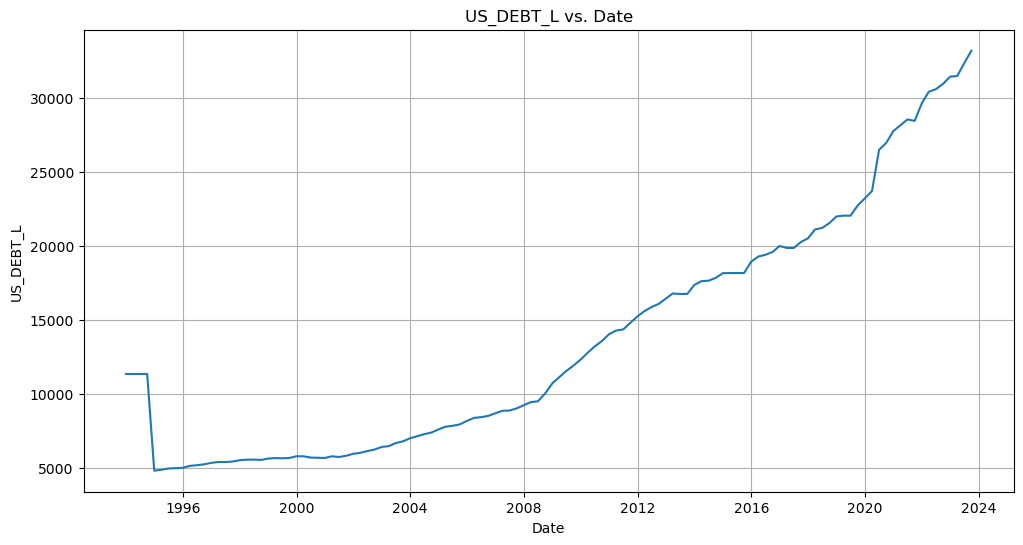

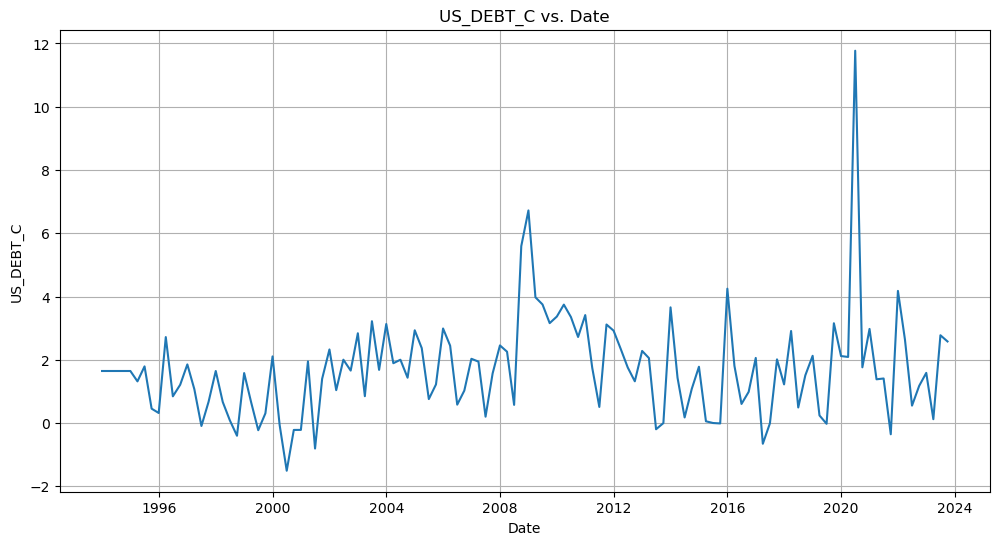

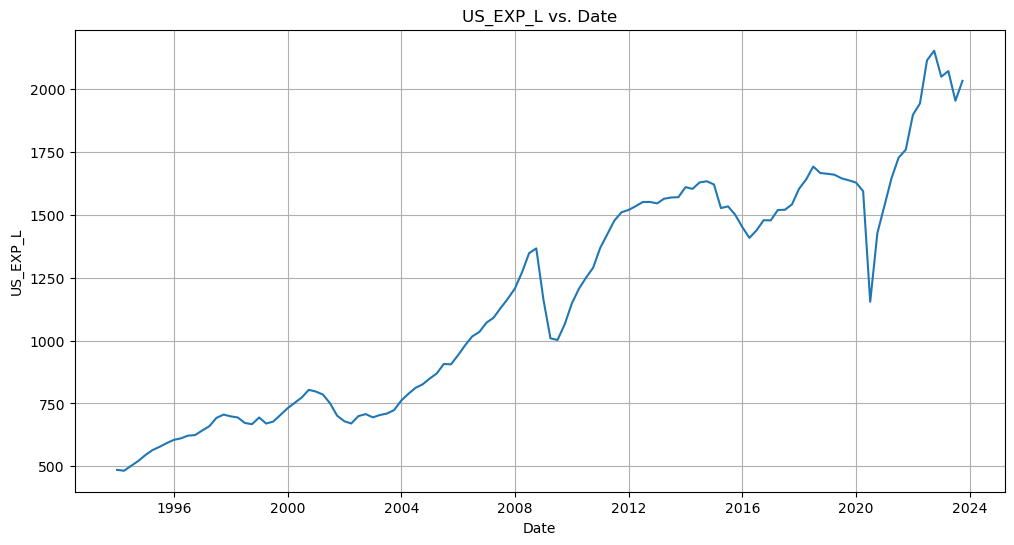

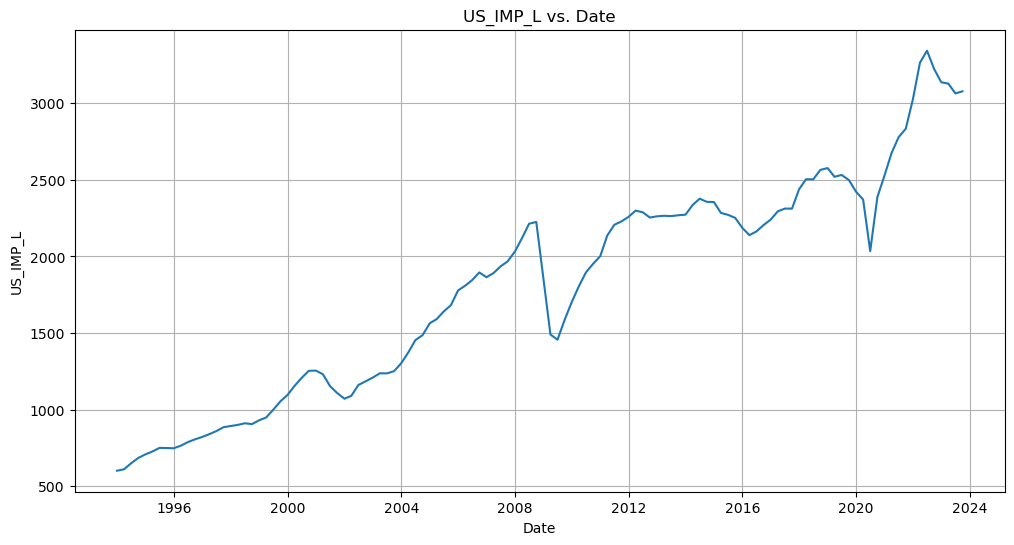

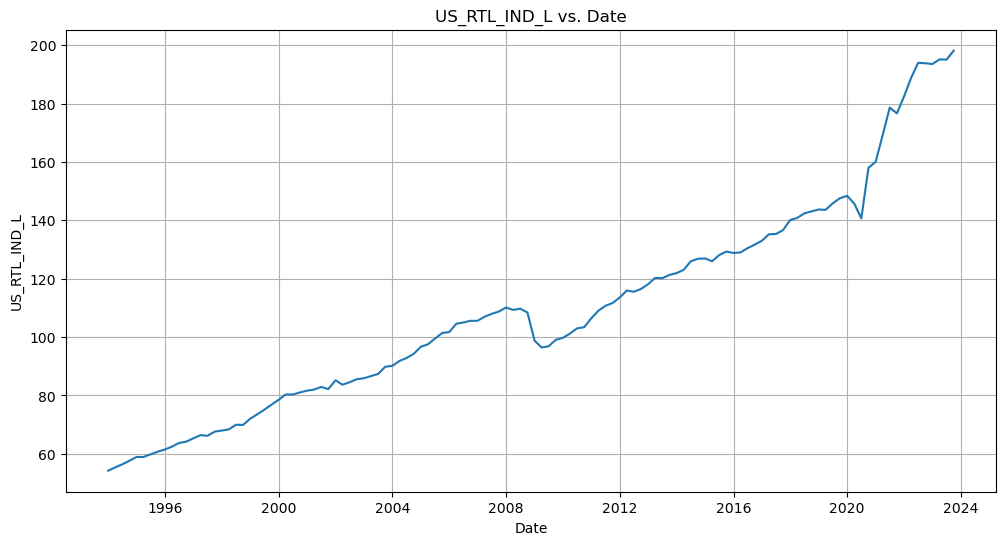

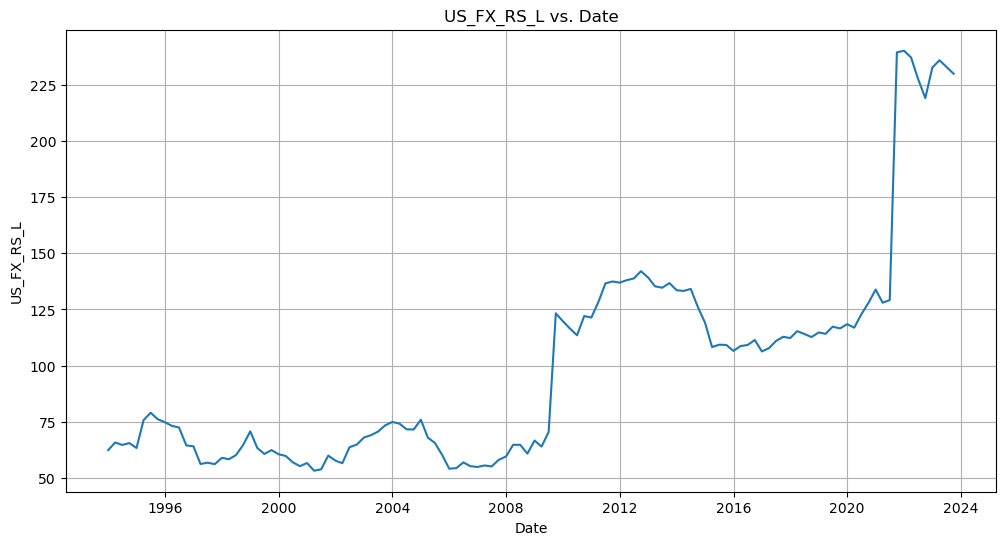

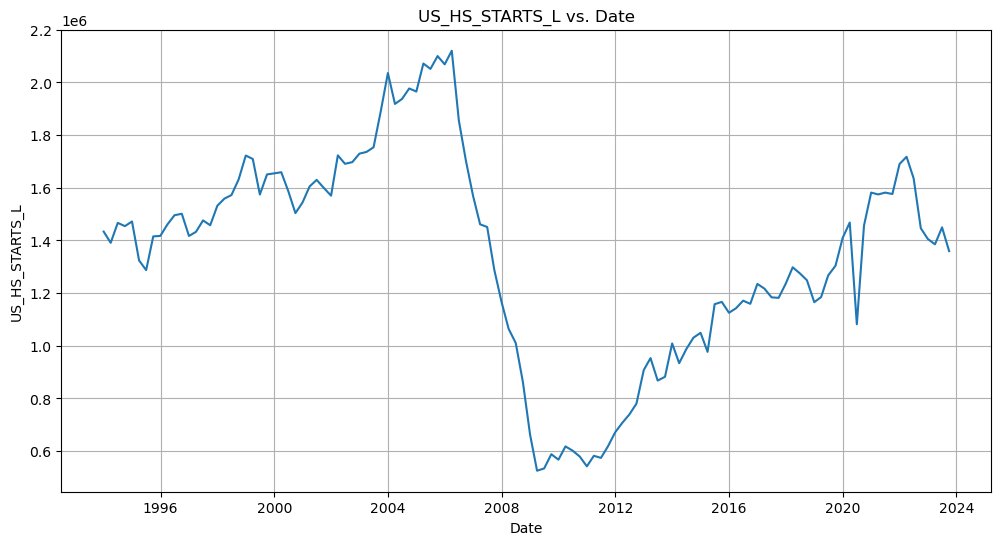

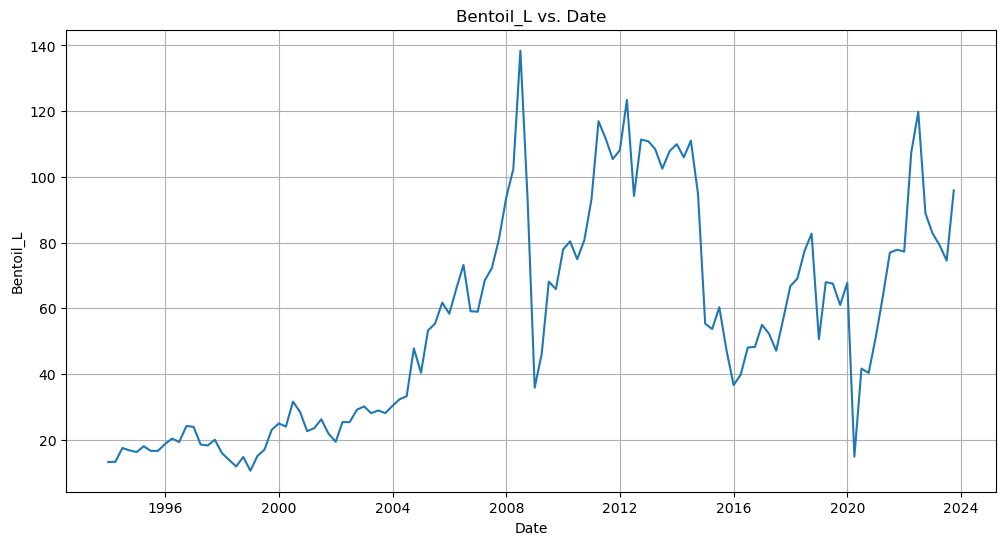

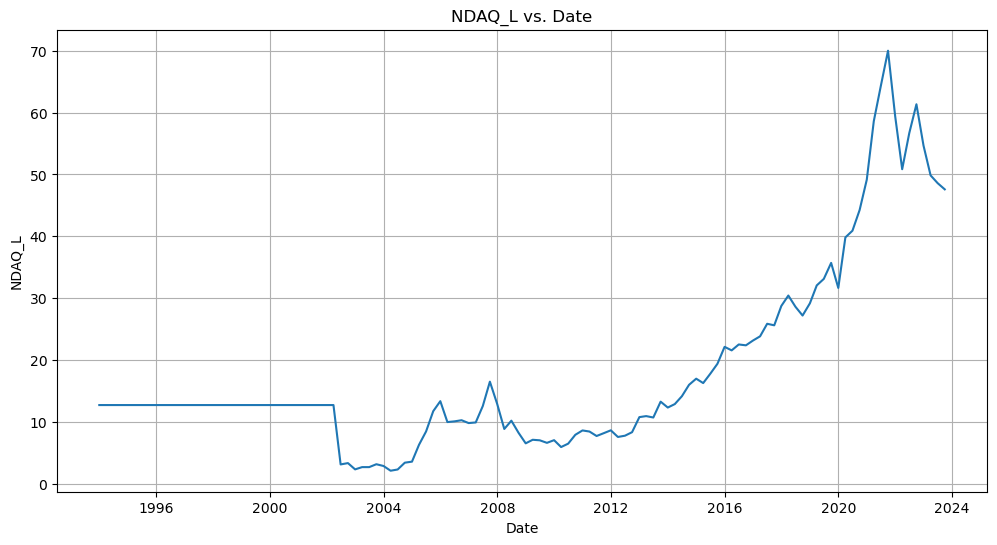

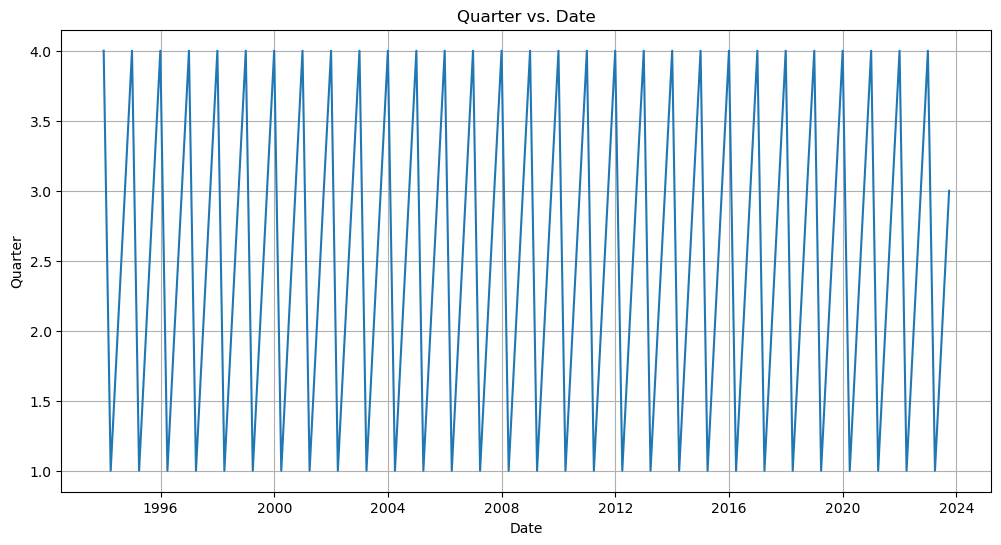

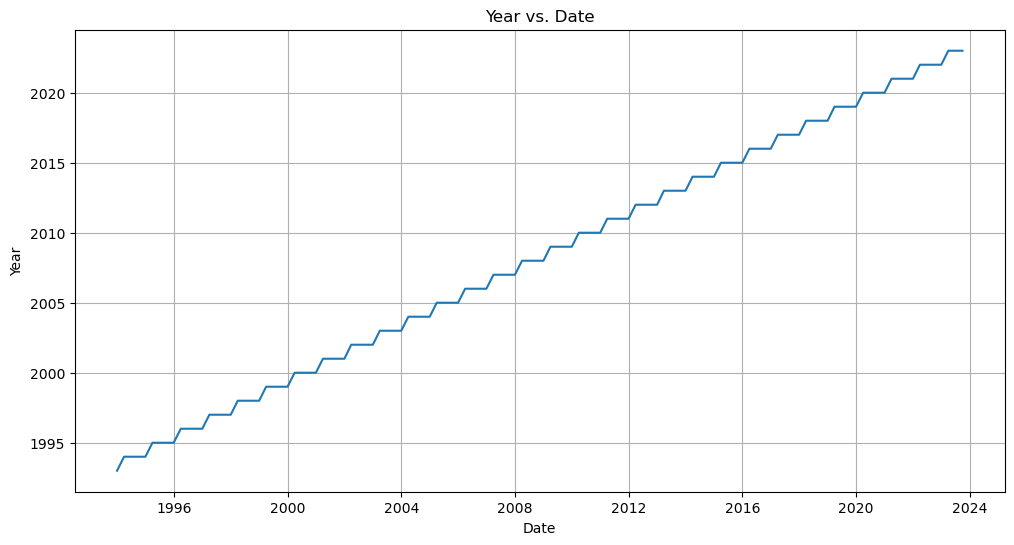

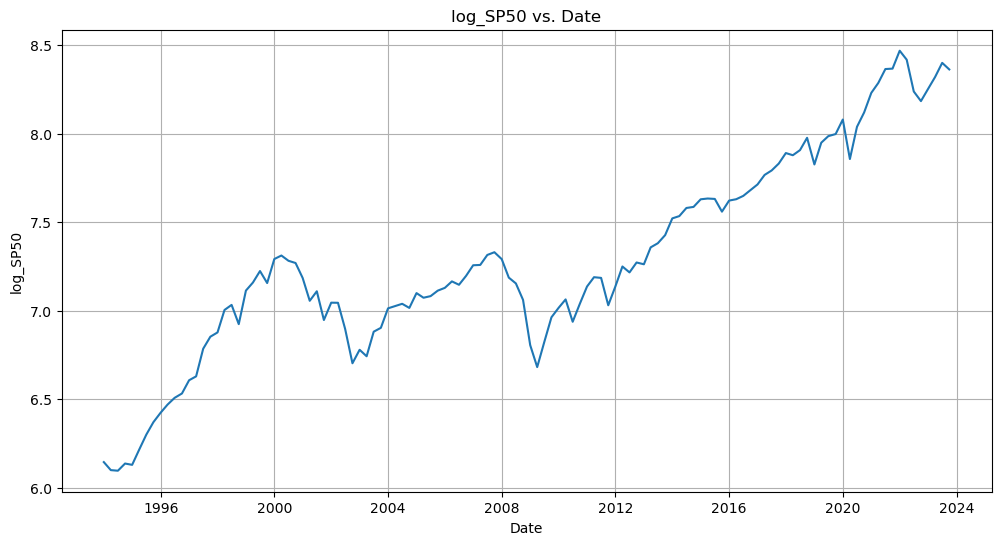

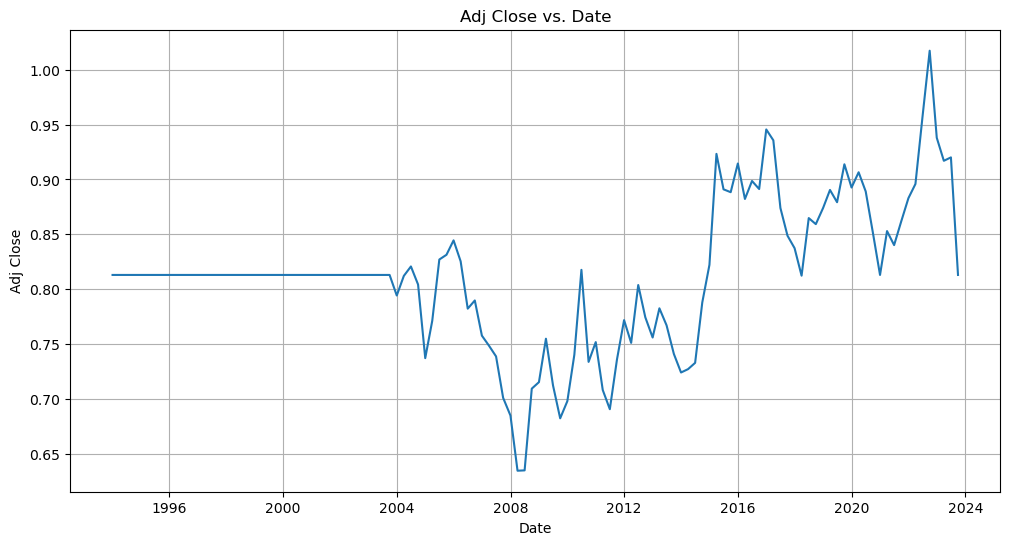

In [86]:
for column in df.columns:
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(df.index, df[column])
    plt.title(f"{column} vs. Date")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [126]:
from statsmodels.tsa.stattools import coint
cointe=[]
# Specify the columns to test for cointegration
# Loop through the specified columns and perform the cointegration test
for column in I1:
        result = coint(df['log_SP50'], df[column])
        p_value = result[1]

        if p_value < 0.05:
            cointe.append((col,column))

cointe

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(


[('RUSSEL_L', 'log_SP50')]

In [127]:
df.columns

Index(['SP50_L', 'SP50_C', 'VIX_L', 'VIX_C', 'RUSSEL_L', 'RUSSEL_C',
       'US CPI Q %', 'US wholesale Q%', 'US_LT_INT', 'US_SR_INT', 'US_UNEMP_L',
       'US_RT_IND_C', 'US_INDPROD_C', 'US_HSTART_C', 'US_EXP_C', 'US_IMP_C',
       'US_BUD_BAL_PCT_GDP', 'US_DEBT_L', 'US_DEBT_C', 'US_EXP_L', 'US_IMP_L',
       'US_RTL_IND_L', 'US_FX_RS_L', 'US_HS_STARTS_L', 'Bentoil_L', 'NDAQ_L',
       'log_SP50'],
      dtype='object')

In [114]:
import yfinance as yf
from statsmodels.tsa.stattools import adfuller

# Define the ticker symbols for the assets
assets = ["^GSPC", "BZ=F", "DX-Y.NYB"]

# Set the date range for the data
start_date = "2000-01-01"
end_date = "2023-09-29"

# Fetch daily data for each asset
asset_data = yf.download(assets, start=start_date, end=end_date, interval="1d")['Adj Close']

# Perform the ADF test for each asset


[*********************100%***********************]  3 of 3 completed


In [116]:
for asset in assets:
    result = adfuller(asset_data[asset], autolag='AIC')
    p_value = result[1]
    is_stationary = p_value < 0.05

    if is_stationary:
        print(f"{asset} is stationary (I(0))")
    else:
        print(f"{asset} is non-stationary (I(1))")


^GSPC is non-stationary (I(1))
BZ=F is stationary (I(0))
DX-Y.NYB is non-stationary (I(1))


In [119]:
import yfinance as yf
from statsmodels.tsa.stattools import coint

# Define the ticker symbols for the assets
assets = ["^GSPC", "BZ=F", "DX-Y.NYB"]

# Set the date range for the data
start_date = "2000-01-01"
end_date = "2023-09-29"

# Fetch daily data for each asset
asset_data = yf.download(assets, start=start_date, end=end_date, interval="1d")['Adj Close']
asset_data.fillna(asset_data.median(), inplace=True)
# Perform the Engle-Granger cointegration test for S&P 500 and Brent Oil
result_sp_brent = coint(asset_data["^GSPC"], asset_data["BZ=F"])
p_value_sp_brent = result_sp_brent[1]
is_cointegrated_sp_brent = p_value_sp_brent < 0.05

if is_cointegrated_sp_brent:
    print("S&P 500 and Brent Oil are cointegrated.")
else:
    print("S&P 500 and Brent Oil are not cointegrated.")

# Perform the Engle-Granger cointegration test for S&P 500 and U.S. Dollar Index
result_sp_dollar = coint(asset_data["^GSPC"], asset_data["DX-Y.NYB"])
p_value_sp_dollar = result_sp_dollar[1]
is_cointegrated_sp_dollar = p_value_sp_dollar < 0.05

if is_cointegrated_sp_dollar:
    print("S&P 500 and U.S. Dollar Index are cointegrated.")
else:
    print("S&P 500 and U.S. Dollar Index are not cointegrated.")


[*********************100%***********************]  3 of 3 completed
S&P 500 and Brent Oil are not cointegrated.
S&P 500 and U.S. Dollar Index are not cointegrated.


In [139]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import coint

# Define the ticker symbols for the assets and exchange rates
symbols = ["^GSPC", "^FTSE", "^STOXX50E", "GBP=X", "EUR=X"]

# Set the date range for the data
start_date = "2010-01-01"
end_date = "2023-09-29"

# Fetch daily data for each asset and exchange rate
asset_data = yf.download(symbols, start=start_date, end=end_date, interval="1d")['Adj Close']

# Replace NaN values with the median of each column
asset_data = asset_data.dropna()

# Initialize a list to store cointegrated pairs
cointegrated_pairs = []

# Perform cointegration tests for pairs of assets
for i in range(len(symbols)):
    for j in range(i+1, len(symbols)):
        result = coint(asset_data[symbols[i]], asset_data[symbols[j]])
        p_value = result[1]
        is_cointegrated = p_value < 0.05

        if is_cointegrated:
            cointegrated_pairs.append((symbols[i], symbols[j]))

# Print the cointegrated pairs
print("Cointegrated Pairs:")
for pair in cointegrated_pairs:
    print(pair)


[*********************100%***********************]  5 of 5 completed
Cointegrated Pairs:
('^FTSE', 'GBP=X')
('^FTSE', 'EUR=X')


In [128]:
asset_data

,EUR=X,GBP=X,^FTSE,^GSPC,^STOXX50E
Date,,,,,
2010-01-01,0.69493,0.61985,6749.700195,2186.319946,3257.479980
2010-01-04,0.69329,0.62059,5500.299805,1132.989990,3017.800049
2010-01-05,0.69609,0.62536,5522.500000,1136.520020,3012.360107
2010-01-06,0.69425,0.62407,5530.000000,1137.140015,3009.659912
2010-01-07,0.69842,0.62759,5526.700195,1141.689941,3007.340088
...,...,...,...,...,...
2023-09-22,0.93795,0.81339,7683.899902,4320.060059,4207.160156
2023-09-25,0.93910,0.81687,7624.000000,4337.439941,4167.370117
2023-09-26,0.94414,0.81879,7625.700195,4273.529785,4129.180176


In [130]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import ADF
from statsmodels.tsa.api import VECM
from statsmodels.tsa.vector_ar.vecm import select_order
from statsmodels.tsa.stattools import coint

# Assuming you have loaded FTSE and GBP/USD data into data frames FTSE_series and GBP_series

# Step 2: Calculate log-returns
FTSE_returns = np.log(asset_data['^FTSE']).diff().dropna()
GBP_returns = np.log(asset_data['GBP=X']).diff().dropna()

# Step 3: Check for Stationarity
adf_test_FTSE = adfuller(FTSE_returns)
adf_test_GBP = adfuller(GBP_returns)

# Step 4: Cointegration Analysis using coint
coint_test = coint(FTSE_returns, GBP_returns, trend='c', method='aeg', maxlag=None)

# Step 5: Estimate Long-Term Equation
if coint_test[1] < 0.05:
    # If cointegration exists, estimate long-term equation
    ecm_model = VECM(np.column_stack((FTSE_returns, GBP_returns)), k_ar_diff=1, coint_rank=1)

# Step 6: Structural Break Analysis
break_test_FTSE = ADF(FTSE_returns)
break_test_GBP = ADF(GBP_returns)

# Step 7: Estimate Error-Correcting Equation
if 'ecm_model' in locals():
    ecm_model = ecm_model.fit()

# Step 8: Model Validation and Testing
# Use various statistical measures and backtesting techniques here.

# Step 9: Interpretation and Reporting
# Interpret the results and report your findings.

# Step 10: Sensitivity Analysis
# Consider sensitivity of your results to different model specifications.

# Your code continues here for additional analysis, interpretation, and reporting.


<AxesSubplot:xlabel='Date'>

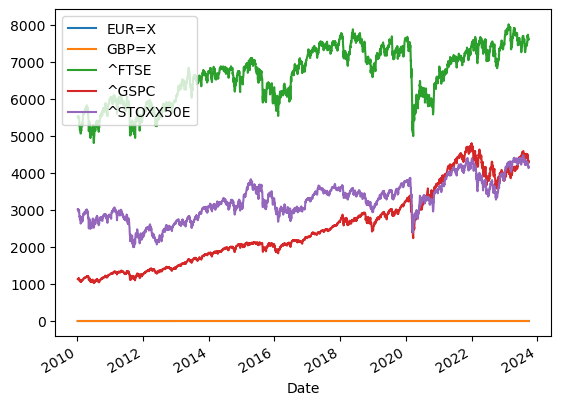

In [140]:
asset_data.plot()

In [133]:
ecm_model.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.y1,0.2136,0.016,13.139,0.000,0.182,0.245
L1.y2,0.4387,0.033,13.190,0.000,0.374,0.504
,coef,std err,z,P>|z|,[0.025,0.975]
L1.y1,0.0424,0.007,6.470,0.000,0.030,0.055
L1.y2,-0.5842,0.013,-43.528,0.000,-0.611,-0.558
,coef,std err,z,P>|z|,[0.025,0.975]
ec1,-1.5541,0.026,-59.553,0.000,-1.605,-1.503
,coef,std err,z,P>|z|,[0.025,0.975]
ec1,-0.0913,0.011,-8.668,0.000,-0.112,-0.071
,coef,std err,z,P>|z|,[0.025,0.975]


In [131]:
# Step 8: Model Validation and Testing

# Assess the goodness of fit of the ECM model
if 'ecm_model' in locals():
    ecm_residuals = ecm_model.resid

    # Perform residual diagnostic tests
    # Example: Check for serial correlation in residuals using the Ljung-Box test
    from statsmodels.stats.diagnostic import acorr_ljungbox
    lb_test = acorr_ljungbox(ecm_residuals, lags=[12])
    p_value = lb_test[1][0]

    if p_value < 0.05:
        print("Residuals show significant serial correlation.")
    else:
        print("Residuals do not show significant serial correlation.")

    # You can also perform other tests, such as normality tests, heteroskedasticity tests, etc.
    # Example: Perform the Jarque-Bera test for normality
    from scipy.stats import jarque_bera
    jb_stat, jb_p_value, _, _ = jarque_bera(ecm_residuals)
    
    if jb_p_value < 0.05:
        print("Residuals are not normally distributed.")
    else:
        print("Residuals are normally distributed.")

    # Evaluate the model's predictive power using out-of-sample tests
    # Example: Split the data into a training and testing set
    train_size = int(0.8 * len(ecm_residuals))
    train, test = ecm_residuals[:train_size], ecm_residuals[train_size:]

    # Fit the model to the training data
    ecm_model_train = VECM(train, k_ar_diff=1, coint_rank=1)
    ecm_model_train = ecm_model_train.fit()

    # Make out-of-sample forecasts
    forecast = ecm_model_train.predict(start=len(train), end=len(train) + len(test) - 1)

    # Compare forecast accuracy using appropriate metrics

# Your code should include additional diagnostic tests and evaluation methods as needed for your analysis.


ValueError: x is required to have ndim 1 but has ndim 2